In [14]:
  %reload_ext autoreload

In [1]:
# chemistry toolkits
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw # for molecule depiction
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Scaffolds import MurckoScaffold
# WHALES-related code
import ChemTools as tools # for molecule pretreatment
import do_whales # importing WHALES descriptors
from ChemTools import prepare_mol_from_sdf # to pretreat the virtual screening library
# for data analysis and plotting
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import euclidean_distances
import numpy
# to delete before uploading
%load_ext autoreload
%autoreload
%reload_ext ChemTools
%reload_ext do_whales

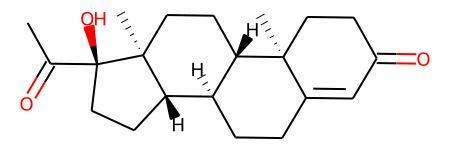

In [2]:
template = Chem.MolFromSmiles('CC(=O)[C@@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@H]3CC[C@@]21C') # imports from SMILES
err = AllChem.Compute2DCoords(template)

template

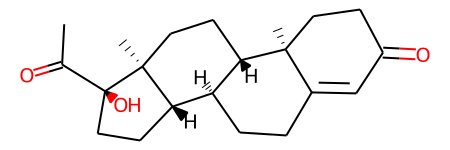

In [3]:
mol, err = tools.prepare_mol(template)
mol

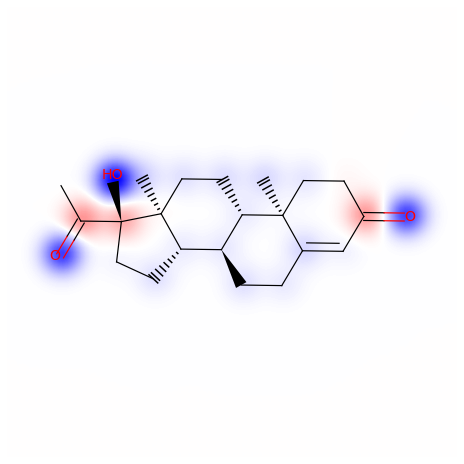

In [4]:
tools.do_map(template,lab_atom=True)

In [5]:
writer = Chem.rdmolfiles.SDWriter('out.sdf')
writer.write(mol)

In [28]:
# set the path to the sdf file for input and output
input_filename = './sedative.sdf'
vs_library_2D = Chem.SDMolSupplier(input_filename) # conserved for 2D representations
vs_library = prepare_mol_from_sdf(input_filename) # computes 3D geometry from a specified sdf file

Molecule: 50
Molecule: 100


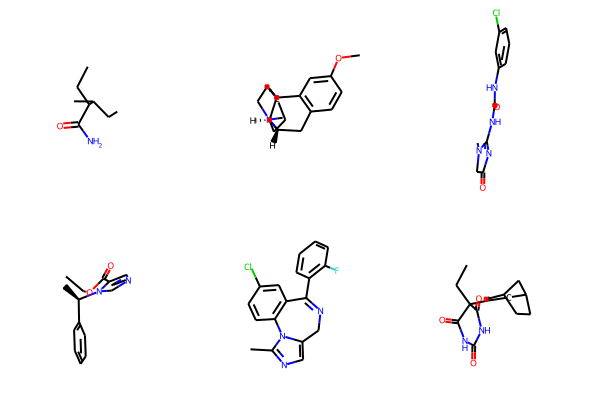

In [7]:
#Visualize the first 6 molecules of the database after geometry optimization
number_mol = 6 # number of molecules to inspect
Draw.MolsToGridImage(vs_library[:number_mol],molsPerRow=3,subImgSize=(200,200))

In [8]:
# compute descriptors as an array
whales_template, lab = do_whales.whales_from_mol(template)
# convert the arrays into a pandas dataframe
df_whales_template = pd.DataFrame(whales_template.reshape(-1, len(whales_template)),index=['template'],columns=lab)
df_whales_template

,R_0,R_1,R_2,R_3,R_4,R_5,R_6,R_7,R_8,R_9,...,IR_1,IR_2,IR_3,IR_4,IR_5,IR_6,IR_7,IR_8,IR_9,IR_10
template,-1.31,-0.991,-0.833,-0.737,-0.657,-0.597,-0.547,-0.403,-0.042,0.428,...,-0.086,-0.08,-0.064,-0.059,-0.042,-0.034,-0.025,0.002,0.037,0.211


In [9]:
whales_library = []
for mol in vs_library: # runs over the library and updates WHALES
    whales_temp, lab = do_whales.whales_from_mol(mol)
    whales_library.append(whales_temp)
# convert the arrays into a pandas dataframe
df_whales_library = pd.DataFrame(whales_library,columns=lab)
df_whales_library.head() # library preview

,R_0,R_1,R_2,R_3,R_4,R_5,R_6,R_7,R_8,R_9,...,IR_1,IR_2,IR_3,IR_4,IR_5,IR_6,IR_7,IR_8,IR_9,IR_10
0,-3.352,-2.715,-2.546,-1.804,-1.339,-1.109,-0.913,-0.790,-0.539,0.342,...,-0.290,-0.228,-0.194,-0.163,-0.143,-0.100,-0.042,0.053,0.545,1.627
1,-2.538,-2.150,-2.060,-2.007,-1.844,-1.215,-0.874,-0.546,-0.142,0.789,...,-0.315,-0.177,-0.120,-0.101,-0.098,-0.076,-0.052,-0.003,0.229,0.510
2,-5.312,-1.952,-1.685,-1.425,-1.265,-0.676,-0.221,0.364,0.633,1.626,...,-0.186,-0.109,-0.077,-0.059,-0.020,0.001,0.049,0.117,0.287,0.708
3,-6.136,-3.278,-2.665,-1.748,-1.430,-0.865,-0.558,0.285,0.705,1.155,...,-0.183,-0.145,-0.112,-0.075,-0.039,-0.030,0.036,0.146,0.220,0.584
4,-3.126,-2.464,-1.754,-1.327,-1.048,-0.572,0.309,0.518,0.697,0.918,...,-0.168,-0.081,-0.057,-0.047,-0.014,0.052,0.139,0.184,0.277,0.951


<AxesSubplot:>

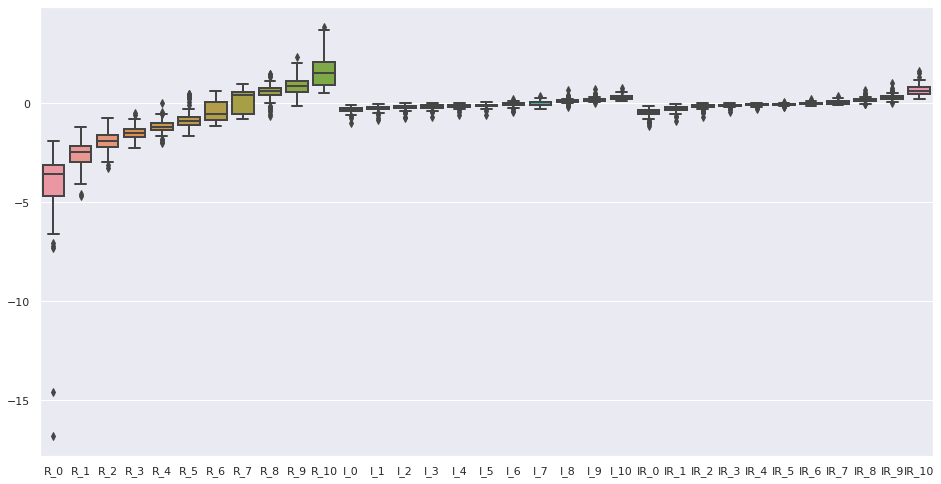

In [10]:
sns.set(rc={'figure.figsize':(16,8.27)}) # sets the size of the boxplot
sns.boxplot(data=df_whales_library,linewidth=2)

In [11]:
aver = df_whales_library.mean()
sdv = df_whales_library.std()
df_whales_library_scaled = (df_whales_library - aver)/sdv
df_whales_library_scaled.to_csv('WHALES_after.csv')

In [12]:
df_whales_template_scaled = (df_whales_template - aver)/sdv
df_whales_template_scaled

,R_0,R_1,R_2,R_3,R_4,R_5,R_6,R_7,R_8,R_9,...,IR_1,IR_2,IR_3,IR_4,IR_5,IR_6,IR_7,IR_8,IR_9,IR_10
template,1.425136,2.436943,2.274783,2.221129,1.630165,0.522835,-0.318283,-0.990369,-1.704837,-1.204747,...,1.23548,0.758469,0.663851,0.363285,0.213515,-0.277403,-0.949352,-1.617002,-1.870684,-1.682791


<AxesSubplot:>

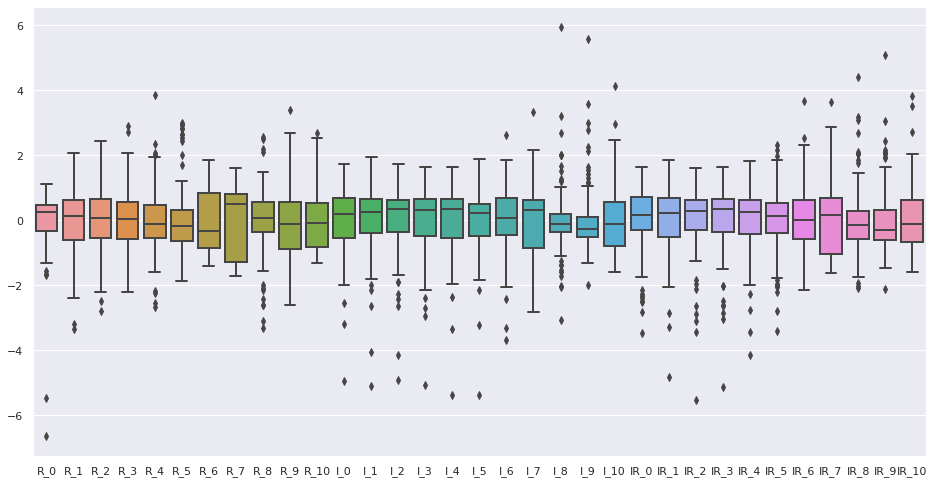

In [13]:
sns.set(rc={'figure.figsize':(16,8.27)})
sns.boxplot(data=df_whales_library_scaled,linewidth=2)

In [14]:
D = euclidean_distances(df_whales_template_scaled,df_whales_library_scaled)

In [15]:
# sorting based on distance
sort_index = numpy.argsort(D) # index for sorting according to D
D_neig = D[:,sort_index] # sorted distance

In [16]:
# selection of the 10 closest compounds
k = 10 # number of compounds to choose
neighbor_ID = sort_index[:,0:k]
neighbor_ID

array([[98, 63, 35, 60, 76, 96, 11, 32, 30, 61]])

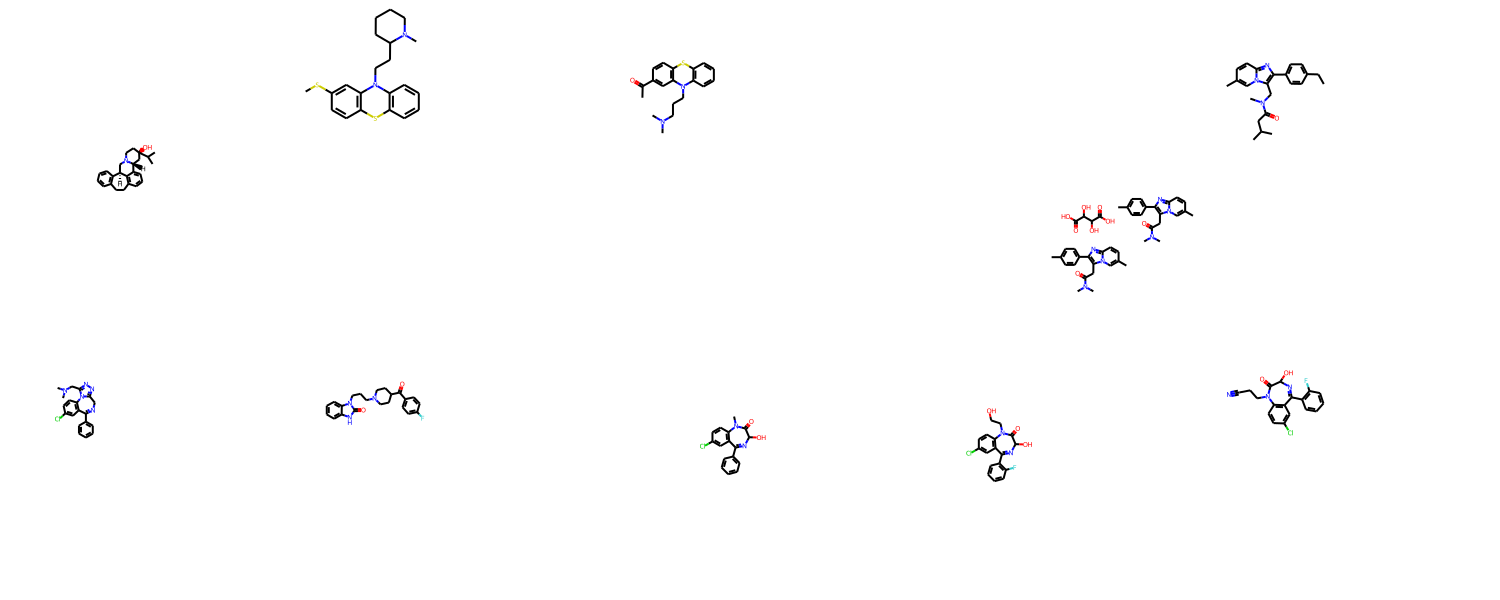

In [17]:
# display of the 10 closest compounds
hits = []
smiles_hits = []
for j in numpy.nditer(neighbor_ID):
    hits.append(vs_library_2D[int(j)])
    smiles_hits.append(Chem.MolToSmiles(mol))

#Visualize the first 10 molecules of the database after geometry optimization
number_mol = 10 # number of molecules to inspect
Draw.MolsToGridImage(hits[:number_mol+1],molsPerRow=5,subImgSize=(300,300),legends=[x.GetProp("_Name") for x in hits[:number_mol+1]])

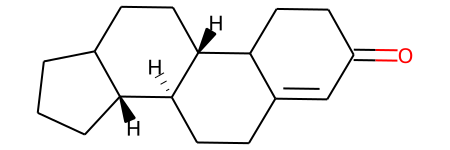

In [18]:
core = MurckoScaffold.GetScaffoldForMol(template)
core

In [19]:
scaffold_vs = [] # generates an empty supplier to contain the computed scaffold
for mol in vs_library_2D:
    scaffold_vs.append(MurckoScaffold.GetScaffoldForMol(mol))

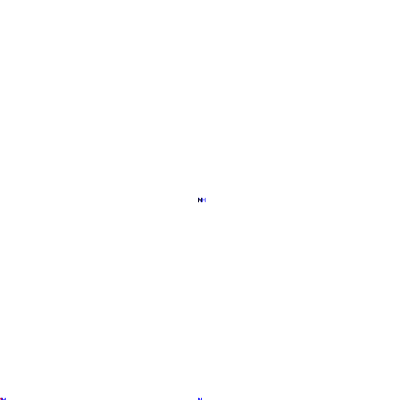

In [20]:
# 4 scaffolds are displayed
k = 4
Draw.MolsToGridImage(scaffold_vs[:k],molsPerRow=2,subImgSize=(200,200),legends=[x.GetProp("_Name") for x in scaffold_vs[:k]])

In [21]:
freq_scaffolds_library = tools.frequent_scaffolds(vs_library_2D) # contains the list of the (unique) scaffolds, sorted by number

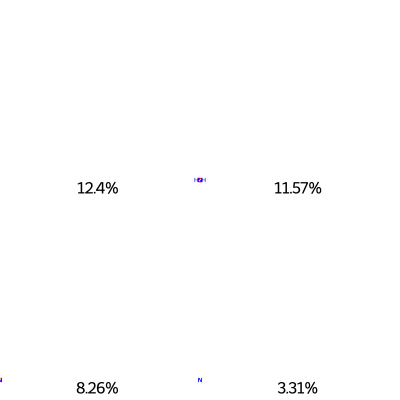

In [22]:
k = 4
Draw.MolsToGridImage(freq_scaffolds_library[:k],molsPerRow=2,subImgSize=(200,200),legends=[x.GetProp("_Name") for x in freq_scaffolds_library[:k]])

In [23]:
SD_rel = len(freq_scaffolds_library)/len(vs_library)*100
print(SD_rel)

58.67768595041323


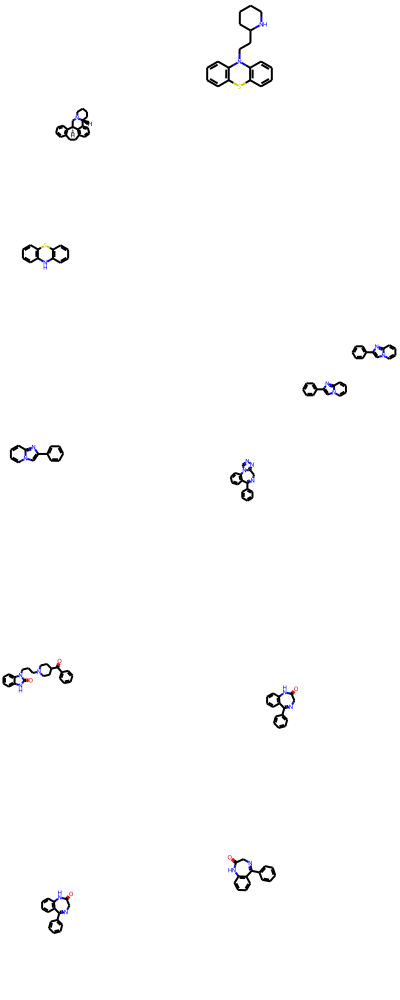

In [24]:
scaffold_hits = []
for mol in hits:
    scaffold_hits.append(MurckoScaffold.GetScaffoldForMol(mol))
 
Draw.MolsToGridImage(scaffold_hits[:10],molsPerRow=2,subImgSize=(200,200),legends=[x.GetProp("_Name") for x in scaffold_hits[:10]])

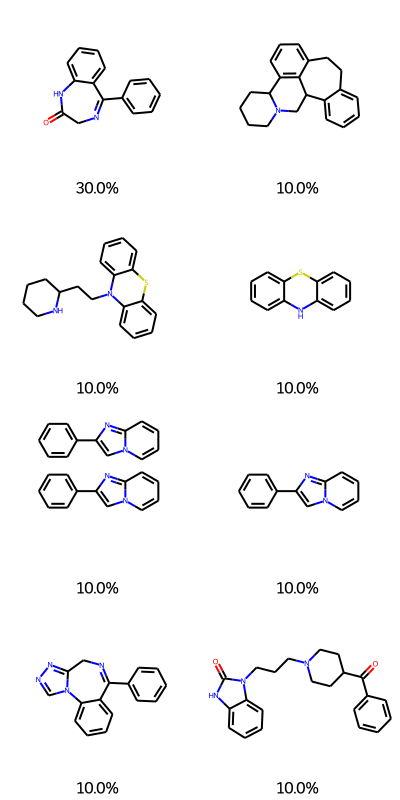

In [25]:
freq_scaffolds_hits = tools.frequent_scaffolds(hits) # contains the list of the (unique) scaffolds, sorted by number
k = len(freq_scaffolds_hits) # display all scaffolds
Draw.MolsToGridImage(freq_scaffolds_hits[:k],molsPerRow=2,subImgSize=(200,200),legends=[x.GetProp("_Name") for x in freq_scaffolds_hits[:k]])